# Chapter 4: Integrating Social and Environmental Data in Coupled Natural-Human Systems <a name="top"></a>

<div class="alert alert-info">
 [⬅️ Previous Chapter](Chapter%203.ipynb)     
</div>

![](../assets/boni.png)

Farmers make several important decisions over the course of a growing season that can have serious consequences for their livelihood. These decisions are subject to a variety of influences such as environmental variability, social norms, government policy, and socio-economic circumstances. In this module, we will explore household-level and field-level data showing variability in planting dates and rainfall, and discuss possible hypotheses for research.

The WAVES lab at UCSB installed 10 crop-monitoring weather stations in Kenya in 2015 and an additional 60 in 2018. These [in-field sensors](https://www.arable.com) go beyond traditional weather measurements  by providing spectral data to sense photosynthetic activity, acoustic detection of precipitation, net radiometry for energy budgets, IR thermometers and telemetry to build advanced analytics and precision agriculture tools. For this activity, we will use data from an older generation of devices for analyzing rainfall. 

Where we work in the Rift Valley Province Mt. Kenya region (0.0˚N, 37.0˚E) is characterized by equatorial rainfall with a bimodal rainfall regime which peaks in the boreal spring (roughly March to May; "long rains") and boreal automumn (October and November: "short rains").  

To read more about precipitation trends around Mt. Kenya see [Schmocker et al. 2016](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/joc.4438).


## Chapter Objectives

* Create functions using python to seperate rainy seasons (define rainy seasons using functions)
* Visualize distributions of planting seasons -- check out # of farmers with one, two vs. three plantings. What was the most frequently planted week? Visualize variability in planting dates
* Hypothesize what social and environmental factors alter farmer decisions, and what impact that has on production
* Calculate likelihood of premature maize
* Will
* Learn

## Read in Data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [118]:
plant = pd.read_csv('../data/maize-plant-with-season.csv', date_parser='Week')
harvest = pd.read_csv('../data/maize-harvest-with-season.csv', date_parser='Week'); plant.head()

print(plant['Season'].value_counts())
print(harvest['Season'].value_counts())

# plant.dtypes

L2017    469
S2016    275
L2016    215
Name: Season, dtype: int64
S2016    291
L2016    141
L2017     13
Name: Season, dtype: int64


In [90]:
# for simplicity, we'll just analyze planting dates during the Short Rains in 2016 (September--end of year) and Harvest during the long rains (January-June)

# filter by season 
plant[plant['Season'].str.contains("L")]

# how many farmers responded?
print(len(plant[plant['Season'].str.contains("L")]))
print(len(harvest[harvest['Season'].str.contains("L")]))

684
154


In [91]:
# how many farmers planted/harvested each week of each season?


S2016    291
L2016    141
L2017     13
Name: Season, dtype: int64

In [92]:
# come up with proportion of farmers planting/harvesting per week
plan = plant['Week'].value_counts().reset_index()
plan.columns = ['Week','Count']; plan

harv = harvest['Week'].value_counts().reset_index()
harv.columns = ['Week','Count']; harv


,Week,Count
0,9/19/16,41
1,10/17/16,35
2,10/10/16,28
3,9/26/16,27
4,10/3/16,24
5,9/5/16,23
6,9/12/16,23
7,10/24/16,22
8,3/14/16,21
9,10/31/16,19


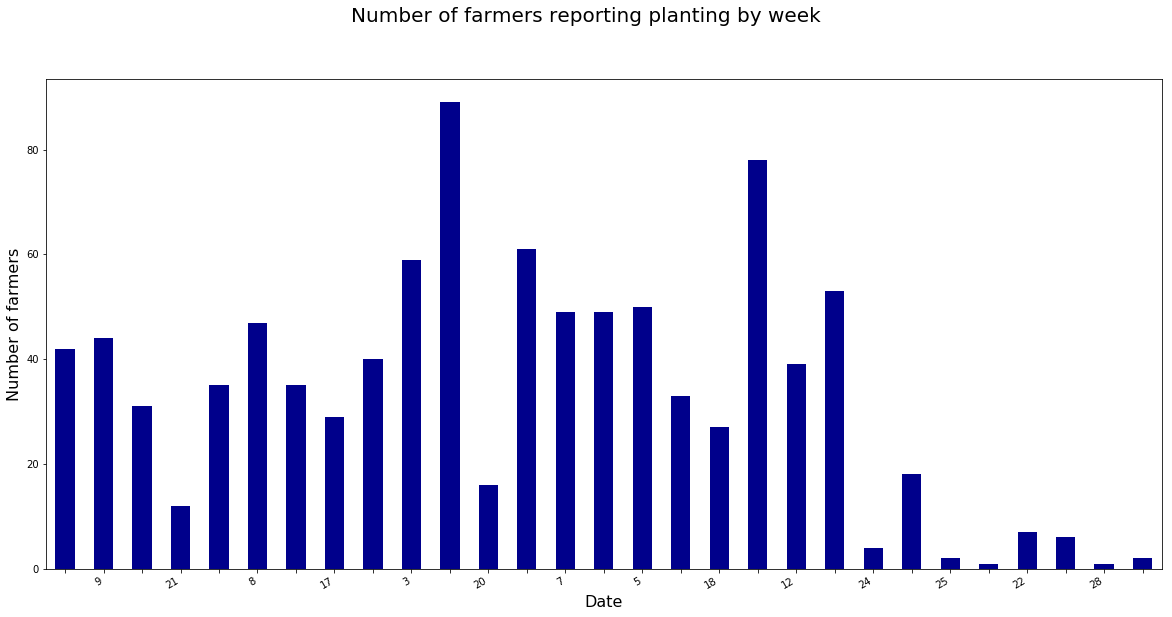

In [102]:
import seaborn as sns

# plot that
plan = plan.sort_values('Week')
plan.set_index('Week')

fig, ax = plt.subplots(1, figsize=(20,10))
ax = plan['Count'].plot(kind='bar', color='darkblue')  #, xticks=plant.index
plt.suptitle('Number of farmers reporting planting by week', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of farmers', fontsize=16)
fig.autofmt_xdate()

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

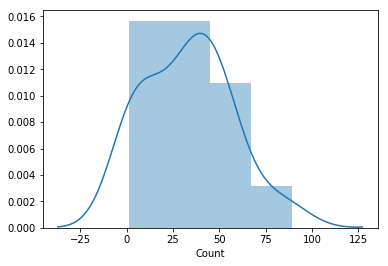

In [96]:
sns.distplot(plan['Count'])

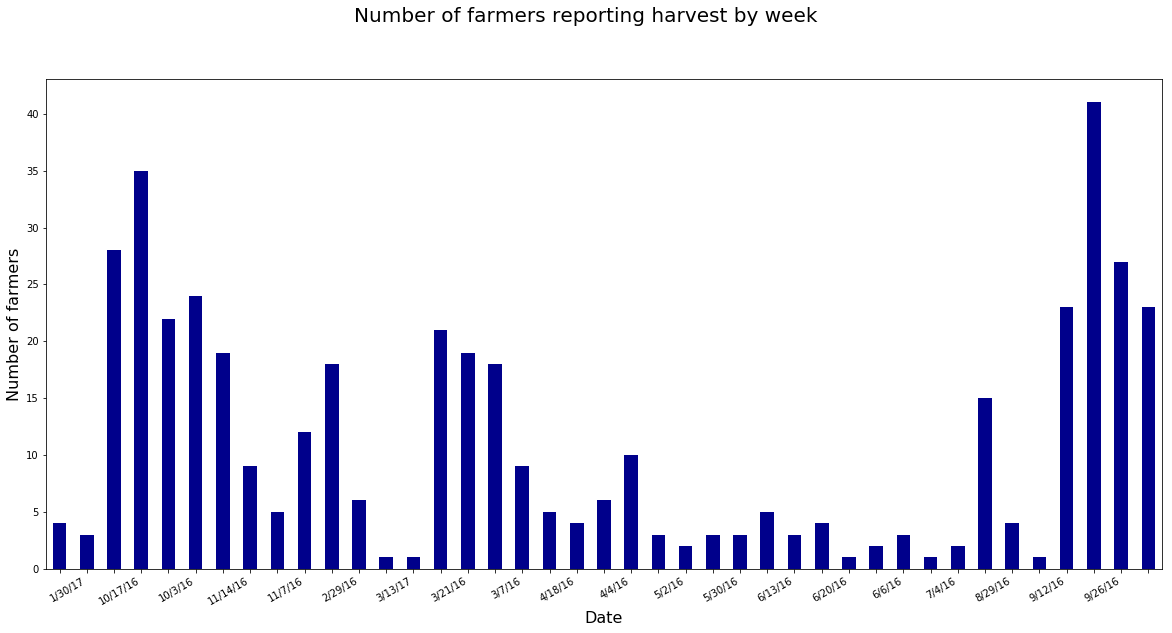

In [115]:
# plot that
#harv = harv.sort_values('Week'); harv
#harv = harv.set_index('Week')

fig, ax = plt.subplots(1, figsize=(20,10))
ax = harv['Count'].plot(kind='bar', color='darkblue') #, xticks=harv.index)
plt.suptitle('Number of farmers reporting harvest by week', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of farmers', fontsize=16)
fig.autofmt_xdate()

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

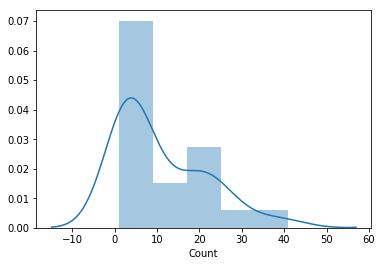

In [116]:
sns.distplot(harv['Count'])